In [1]:
from rsna_retro.imports import *
from rsna_retro.metadata import *
from rsna_retro.preprocess import *
from rsna_retro.train import *

Loading imports


In [2]:
torch.cuda.set_device(6)

## Load Model

In [3]:
name = 'baseline_any_xse_resnext18'

In [4]:
dbch = get_data(512, 128)
learn = get_learner(dbch, xse_resnext18)

In [5]:
learn.model

Sequential(
  (0): Sequential(
    (0): ConvLayer(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): ConvLayer(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): ConvLayer(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): ResBlock(
        (convs): Sequential(
          (0): ConvLayer(
            (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          

## Training

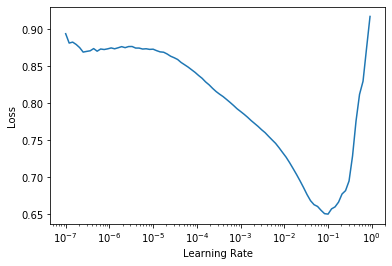

In [6]:
learn.lr_find()

In [7]:
do_fit(learn, 20, 4e-2)
learn.save(f'runs/{name}-1')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time
0,0.261018,0.404958,0.850748,0.529652,03:46
1,0.229569,0.324275,0.889335,0.776401,03:51
2,0.213411,0.239477,0.913720,0.846881,03:46
3,0.208680,0.210610,0.923189,0.863753,03:54
4,0.200134,0.229940,0.915548,0.848656,03:49
5,0.195726,0.247831,0.912321,0.838962,03:46
6,0.188373,0.242950,0.915998,0.837823,03:38
7,0.187590,0.255227,0.913442,0.826831,03:34
8,0.182023,0.205059,0.925736,0.856231,03:35
9,0.182099,0.209927,0.926111,0.863886,03:24


In [8]:
learn.dls = get_data(512, 256)
learn.load(f'runs/{name}-1')

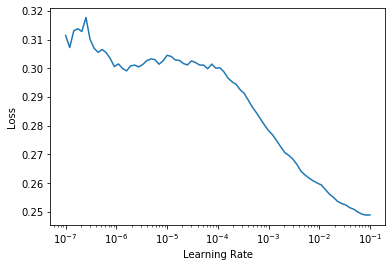

In [23]:
learn.lr_find()

In [9]:
do_fit(learn, 20, 4e-3)
learn.save(f'runs/{name}-2')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time
0,0.175653,0.188590,0.933073,0.880334,08:02
1,0.162927,0.176680,0.937871,0.889233,07:38
2,0.155054,0.173989,0.938353,0.888306,07:41
3,0.152111,0.173925,0.939549,0.891538,07:39
4,0.145648,0.177316,0.938132,0.891405,07:41
5,0.145099,0.172318,0.940154,0.892968,07:44
6,0.141510,0.169515,0.940992,0.895193,07:50
7,0.137893,0.176693,0.939112,0.890346,07:55
8,0.135870,0.172113,0.940639,0.893153,07:50
9,0.132024,0.177473,0.940511,0.893604,07:51


In [10]:
learn.dls = get_data(512, 256, full_ds=True)
do_fit(learn, 2, 5e-4)
learn.save(f'runs/{name}-3-full')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time
0,0.048891,0.092849,0.974314,0.950078,18:20
1,0.046012,0.093819,0.974410,0.950078,18:11


## Submission

In [6]:
learn.load(f'runs/{name}-3-full')
sub_fn = f'subm/{name}'

In [7]:
learn.dls = get_test_data(Meta.df_tst, bs=512, sz=None, tst_dir='tst_jpg256')

In [8]:
ob = learn.dls.one_batch()

In [9]:
preds,targs = learn.get_preds()

In [10]:
pred_csv = submission(Meta.df_tst, preds, fn=sub_fn)

In [11]:
api.competition_submit(f'{sub_fn}.csv', name, 'rsna-intracranial-hemorrhage-detection')

100%|██████████| 26.0M/26.0M [00:02<00:00, 9.95MB/s]


Successfully submitted to RSNA Intracranial Hemorrhage Detection

In [12]:
api.competitions_submissions_list('rsna-intracranial-hemorrhage-detection')[0]

{'ref': 13768513,
 'totalBytes': 27277209,
 'date': '2019-12-12T18:21:45.967Z',
 'description': 'baseline_any_xse_resnext18',
 'errorDescription': None,
 'fileName': 'baseline_any_xse_resnext18.csv',
 'publicScore': '0.66063',
 'privateScore': '0.08224',
 'status': 'complete',
 'submittedBy': 'Andrew Shaw',
 'submittedByRef': 'bearpelican',
 'teamName': 'Andrew Shaw',
 'type': 'standard',
 'url': 'https://www.kaggle.com/submissions/13768513/13768513.raw'}